Решение задачи о погоне
Случай 1: Катер начинает с расстояния 2.088 км
1: Точка пересечения ≈ (1.68, 2.93) км


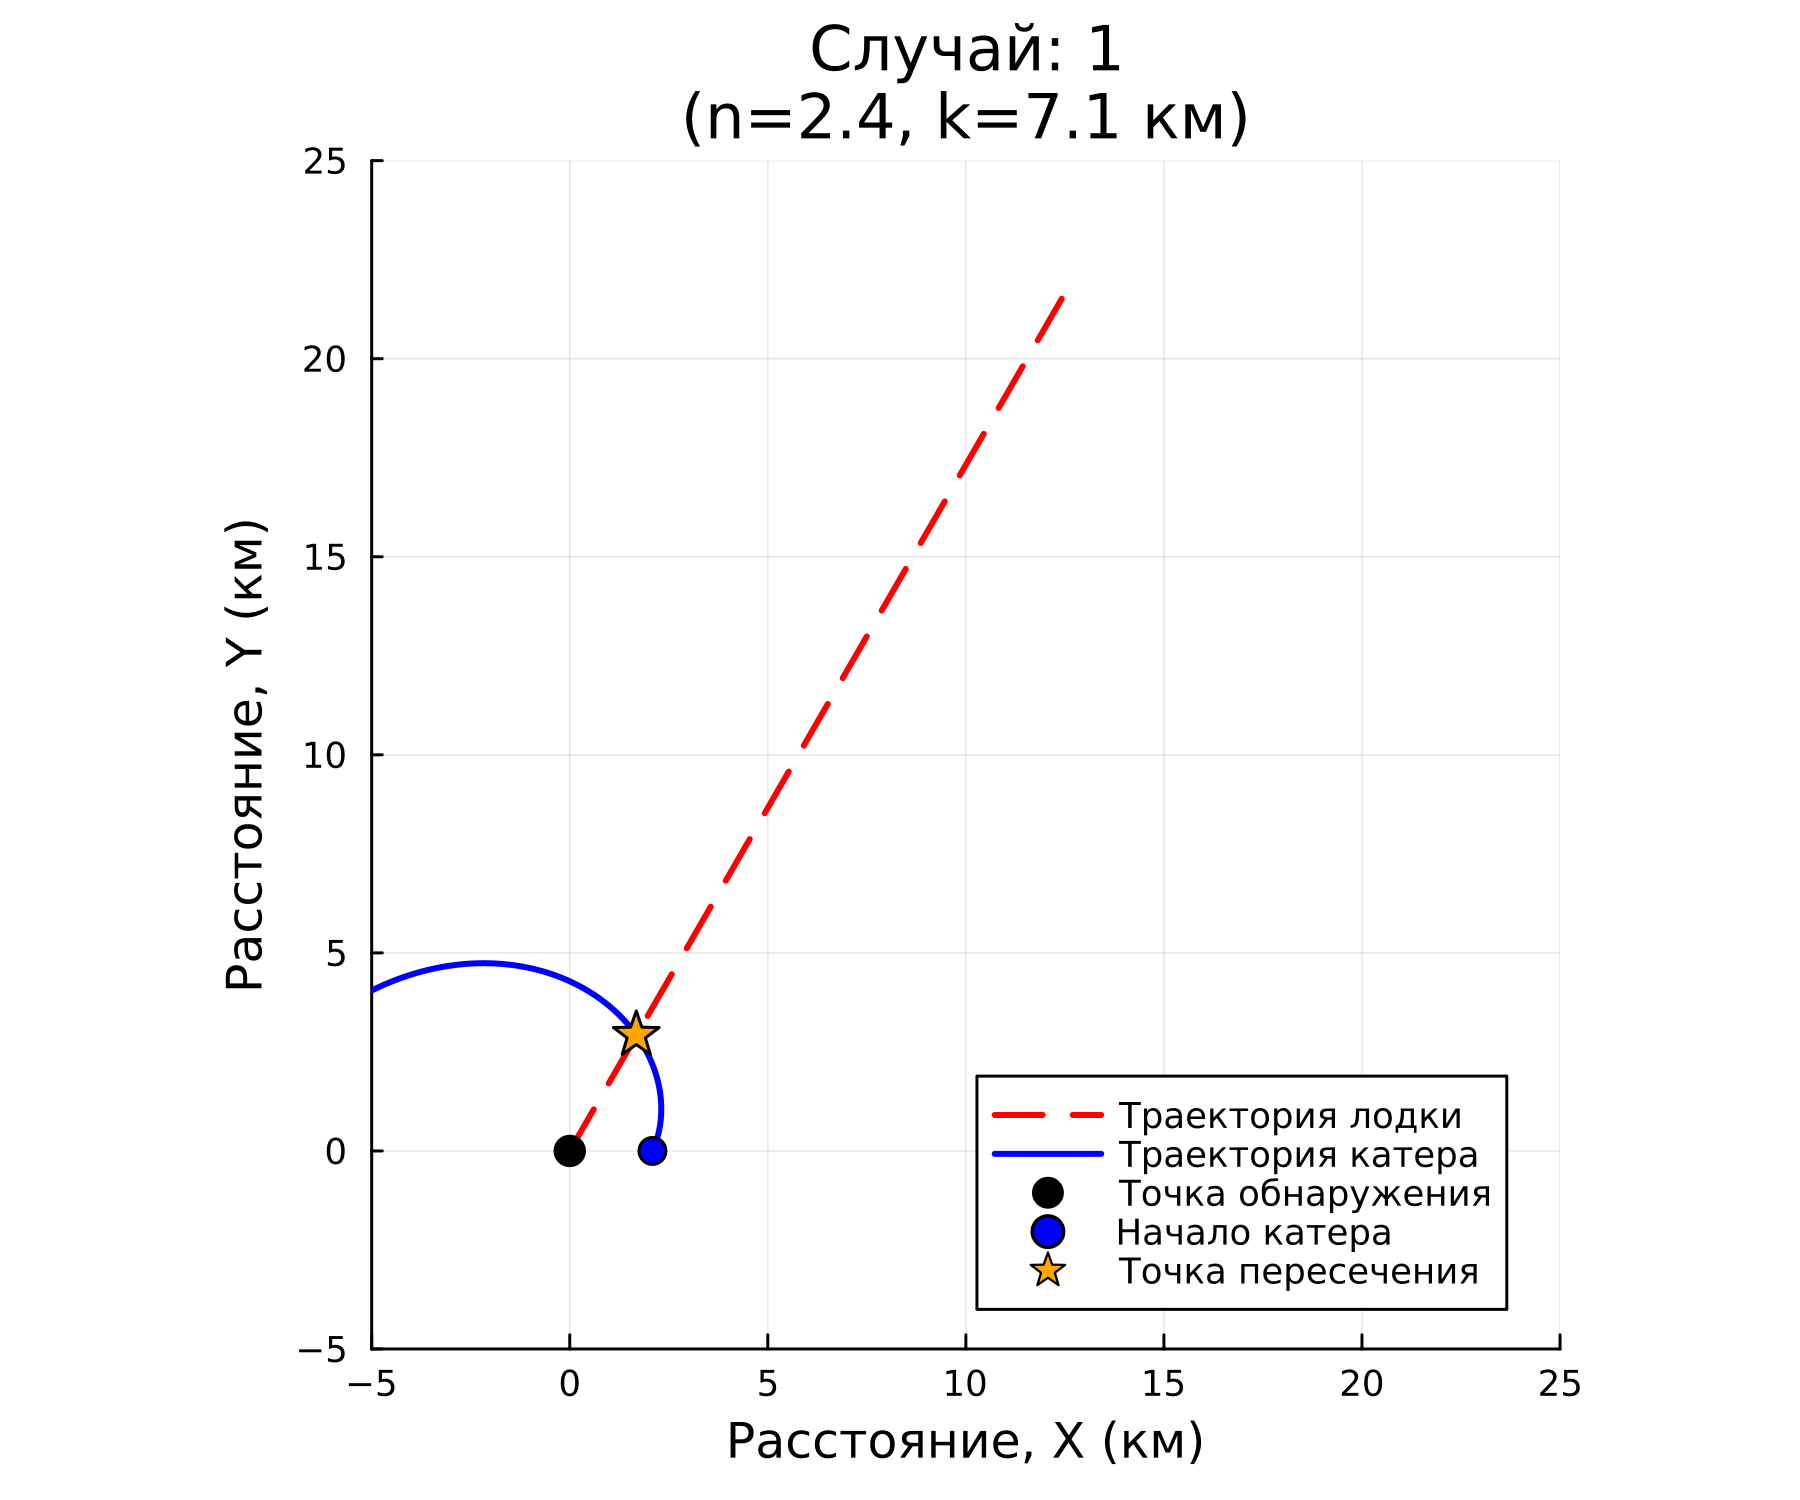


Случай 2: Катер начинает с расстояния 7.1 км
2: Точка пересечения не найдена (минимальное расстояние = 7.1 км)


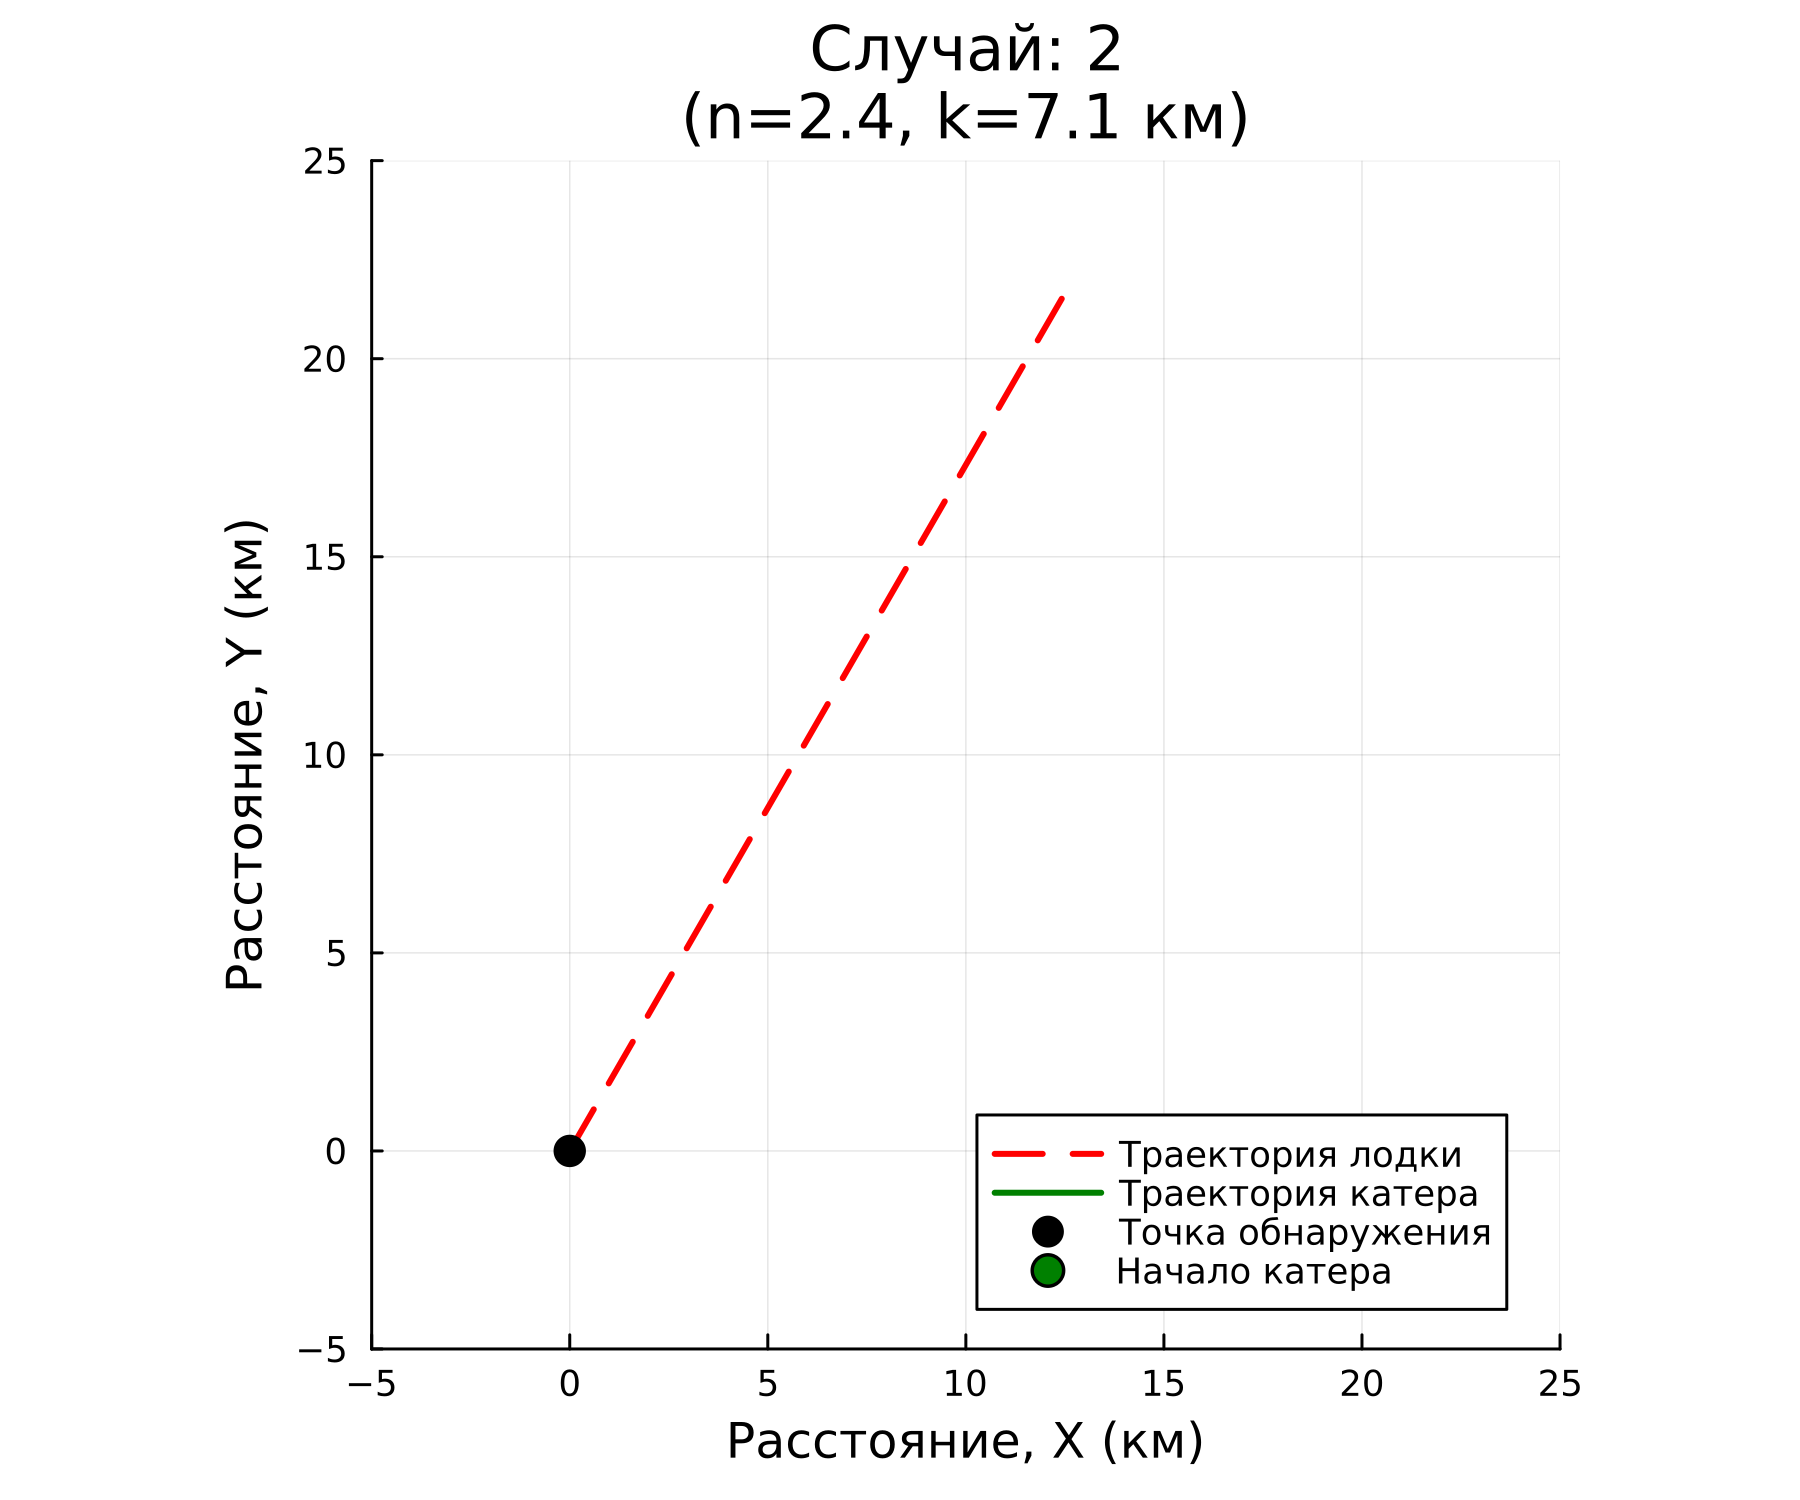

In [14]:
using Plots

# Параметры задачи
v = 1.0    # Скорость лодки
n = 2.4    # Отношение скоростей (катер/лодка)
k = 7.1    # Начальное расстояние (км)
boat_angle = 60 * 3.14159/180  # Угол движения лодки (60 градусов в радианах)

# Простое численное решение дифференциального уравнения методом Эйлера
function solve_pursuit_simple(initial_angle, initial_radius, n, num_steps=2000)
    angles = Float64[]
    radii = Float64[]
    
    push!(angles, initial_angle)
    push!(radii, initial_radius)
    
    # Шаг интегрирования
    d_angle = 0.01
    
    for i in 2:num_steps
        new_angle = angles[end] + d_angle
        # dr/dangle = r/sqrt(n²-1)
        new_radius = radii[end] + (radii[end] / sqrt(n^2 - 1)) * d_angle
        
        push!(angles, new_angle)
        push!(radii, new_radius)
        
        # Останавливаемся, если радиус стал слишком большим
        if new_radius > 30.0 || length(angles) >= num_steps
            break
        end
    end
    
    return angles, radii
end

# Функция для построения графика одного случая
function create_pursuit_plot(initial_angle, initial_radius, case_name, color, max_angle)
    # Решаем уравнение с увеличенным диапазоном углов
    angles, radii = solve_pursuit_simple(initial_angle, initial_radius, n, 3000)
    
    # Координаты катера
    x_cathet = radii .* cos.(angles)
    y_cathet = radii .* sin.(angles)
    
    # Координаты лодки (прямолинейное движение)
    t_max = 25.0  # Увеличиваем время движения лодки
    time_points = range(0, stop=t_max, length=200)
    x_boat = v .* time_points .* cos(boat_angle)
    y_boat = v .* time_points .* sin.(boat_angle)
    
    # Создаем график
    plt = plot(size=(600, 500), dpi=300)
    
    # Добавляем траектории
    plot!(plt, x_boat, y_boat, label="Траектория лодки", linewidth=2, 
          linestyle=:dash, color=:red)
    plot!(plt, x_cathet, y_cathet, label="Траектория катера", 
          linewidth=2, color=color)
    scatter!(plt, [0], [0], label="Точка обнаружения", markersize=6, color=:black)
    scatter!(plt, [x_cathet[1]], [y_cathet[1]], label="Начало катера", 
             markersize=5, color=color)
    
    # Находим приблизительную точку пересечения
    min_distance = Inf
    intersection_point = (0.0, 0.0)
    
    for i in 1:length(x_cathet)
        for j in 1:length(x_boat)
            dx = x_cathet[i] - x_boat[j]
            dy = y_cathet[i] - y_boat[j]
            distance = sqrt(dx^2 + dy^2)
            
            if distance < min_distance
                min_distance = distance
                intersection_point = (x_cathet[i], y_cathet[i])
            end
        end
    end
    
    # Отмечаем точку пересечения только если она достаточно близка
    if min_distance < 1.0  # только если расстояние меньше 1 км
        scatter!(plt, [intersection_point[1]], [intersection_point[2]], 
                 label="Точка пересечения", markersize=8, color=:orange, marker=:star)
        println("$case_name: Точка пересечения ≈ ($(round(intersection_point[1], digits=2)), $(round(intersection_point[2], digits=2))) км")
    else
        println("$case_name: Точка пересечения не найдена (минимальное расстояние = $(round(min_distance, digits=2)) км)")
    end
    
    # Настройки графика
    plot!(plt, xlim=(-5, 25), ylim=(-5, 25), aspect_ratio=:equal,
          xlabel="Расстояние, X (км)", ylabel="Расстояние, Y (км)",
          title="Случай: $case_name\n(n=$n, k=$k км)",
          legend=:bottomright)
    
    return plt, intersection_point
end

# Основная программа
println("Решение задачи о погоне")
println("="^50)

# Случай 1: начальный угол = 0, начальный радиус = k/(n+1)
println("Случай 1: Катер начинает с расстояния $(round(k/(n+1), digits=3)) км")
plt1, point1 = create_pursuit_plot(0.0, k/(n+1), "1", :blue, 4.0)
display(plt1)

# Случай 2: начальный угол = -π, начальный радиус = k  
println("\nСлучай 2: Катер начинает с расстояния $k км")
plt2, point2 = create_pursuit_plot(-3.14159, k, "2", :green, 10.0)  # Увеличиваем max_angle!
display(plt2)